In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
dataset_path = os.listdir('Fish_Dataset')

print (dataset_path) 

print("Types of classes labels found: ", len(dataset_path))

['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
Types of classes labels found:  9


In [3]:
class_labels = []

for item in dataset_path:
 all_classes = os.listdir('Fish_Dataset' + '/' +item)
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

In [4]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

            Labels                                   image
0  Black Sea Sprat  dataset_path/Black Sea Sprat/00001.png
1  Black Sea Sprat  dataset_path/Black Sea Sprat/00002.png
2  Black Sea Sprat  dataset_path/Black Sea Sprat/00003.png
3  Black Sea Sprat  dataset_path/Black Sea Sprat/00004.png
4  Black Sea Sprat  dataset_path/Black Sea Sprat/00005.png
     Labels                         image
8995  Trout  dataset_path/Trout/00996.png
8996  Trout  dataset_path/Trout/00997.png
8997  Trout  dataset_path/Trout/00998.png
8998  Trout  dataset_path/Trout/00999.png
8999  Trout  dataset_path/Trout/01000.png


In [5]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  9000
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: Labels, dtype: int64


In [6]:
import cv2
path = 'Fish_Dataset/'
dataset_path = os.listdir('Fish_Dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [8]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(9000, 224, 224, 3)

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Black Sea Sprat' 'Black Sea Sprat' 'Black Sea Sprat' ... 'Trout' 'Trout'
 'Trout']
[0 0 0 ... 8 8 8]


In [10]:
y=y.reshape(-1,1)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(7200, 224, 224, 3)
(7200, 9)
(1800, 224, 224, 3)
(1800, 9)


In [18]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
NUM_CLASSES = 9
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 9)                4061100   
                                                                 
Total params: 4,061,100
Trainable params: 4,019,077
Non-trainable params: 42,023
_________________________________________________________________


In [20]:
hist = model.fit(train_x, train_y, epochs=25, verbose=1)

Epoch 1/25
225/225 [==============================] - 785s 3s/step - loss: 2.0351 - accuracy: 0.4397
Epoch 2/25
225/225 [==============================] - 736s 3s/step - loss: 0.8360 - accuracy: 0.7468
Epoch 3/25
225/225 [==============================] - 756s 3s/step - loss: 0.4243 - accuracy: 0.8640
Epoch 4/25
225/225 [==============================] - 753s 3s/step - loss: 0.2252 - accuracy: 0.9287
Epoch 5/25
225/225 [==============================] - 717s 3s/step - loss: 0.1953 - accuracy: 0.9371
Epoch 6/25
225/225 [==============================] - 731s 3s/step - loss: 0.1137 - accuracy: 0.9629
Epoch 7/25
225/225 [==============================] - 739s 3s/step - loss: 0.0886 - accuracy: 0.9718
Epoch 8/25
225/225 [==============================] - 835s 4s/step - loss: 0.1119 - accuracy: 0.9646
Epoch 9/25
225/225 [==============================] - 781s 3s/step - loss: 0.1243 - accuracy: 0.9590
Epoch 10/25
225/225 [==============================] - 755s 3s/step - loss: 0.0446 - accura

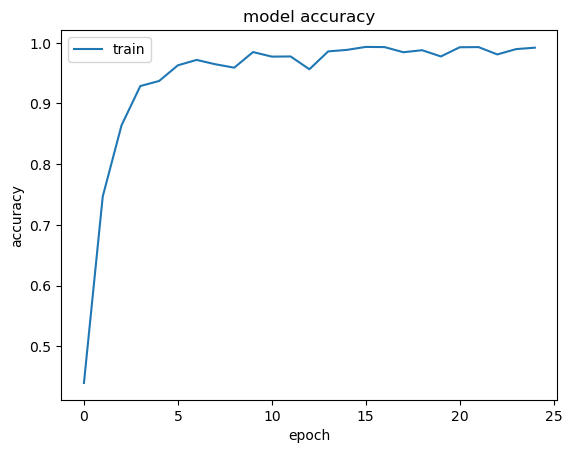

In [21]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)


In [22]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

57/57 [==============================] - 39s 647ms/step - loss: 0.6437 - accuracy: 0.8139
Loss = 0.6437315344810486
Test Accuracy = 0.8138889074325562


In [23]:
from sklearn.metrics import classification_report

predictions = model.predict(test_x)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(test_y, axis=1)

report = classification_report(true_labels, predicted_labels)
print(report)


57/57 [==============================] - 38s 638ms/step
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       190
           1       0.95      0.90      0.92       196
           2       0.44      1.00      0.61       205
           3       1.00      0.92      0.96       186
           4       0.97      0.80      0.88       217
           5       0.93      0.79      0.85       203
           6       0.86      0.66      0.75       185
           7       0.98      0.60      0.75       207
           8       0.93      0.98      0.96       211

    accuracy                           0.81      1800
   macro avg       0.89      0.81      0.83      1800
weighted avg       0.89      0.81      0.83      1800



In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

57/57 [==============================] - 36s 633ms/step


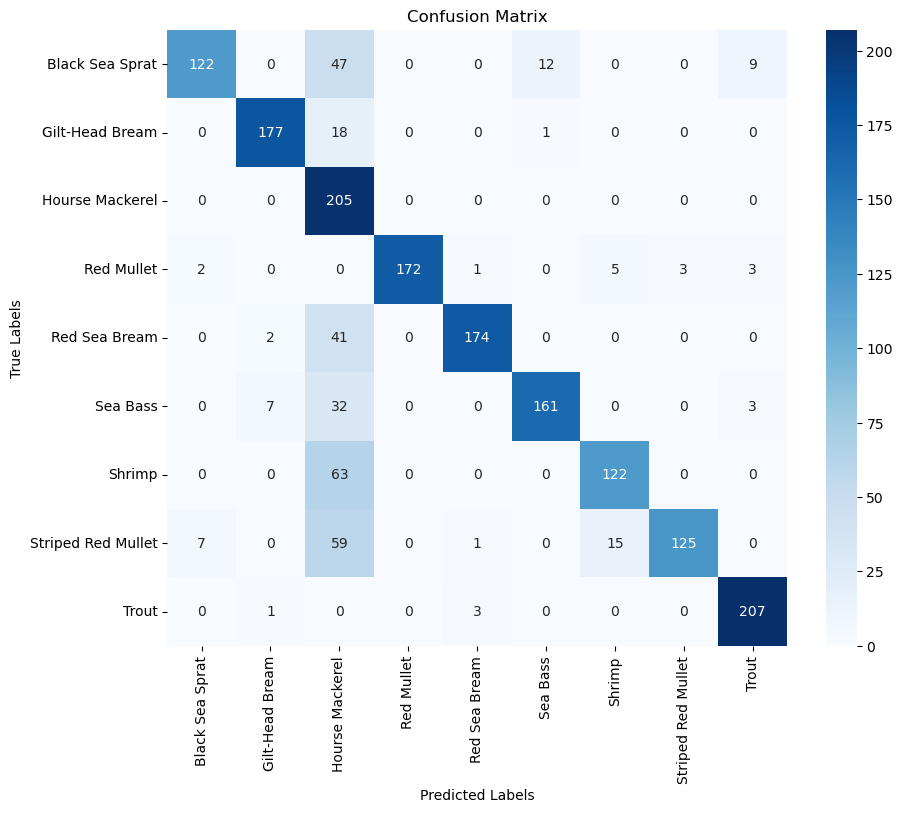

In [25]:
preds = model.predict(test_x)
y_true = np.argmax(test_y, axis=1)
y_pred = np.argmax(preds, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_count.index, yticklabels=label_count.index)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()